In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(10)
X = np.random.normal(0, 1, (100, 2))
y = np.array((X[:, 0] ** 2 + X[:, 1] ** 2) < 1.5, dtype="int")

In [3]:
for _ in range(10):
    y[np.random.randint(100)] = 1

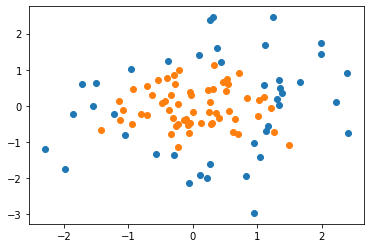

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [5]:
# 决策边界的公共方法
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

#### 逻辑回归

In [6]:
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
log_res.score(X, y)

0.69

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


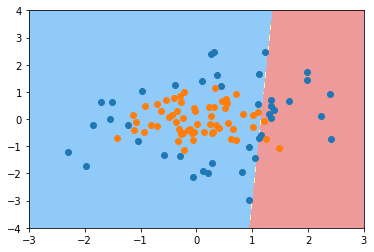

In [8]:
plot_decision_boundary(log_res, [-3, 3, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### 多项式回归

In [9]:
def polynomialLogisticRegression(degree):
    return Pipeline([('poly', PolynomialFeatures(degree)), 
                     ('stand', StandardScaler()),
                     ('log_res', LogisticRegression())])

In [10]:
pol_log_res = polynomialLogisticRegression(2)

In [11]:
pol_log_res.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_res',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [12]:
pol_log_res.score(X, y)

0.88

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


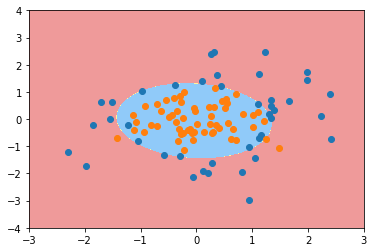

In [13]:
plot_decision_boundary(pol_log_res, [-3, 3, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#### degree = 20

In [14]:
pol_log_res2 = polynomialLogisticRegression(20)
pol_log_res2.fit(X, y)
pol_log_res2.score(X, y)

0.91

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


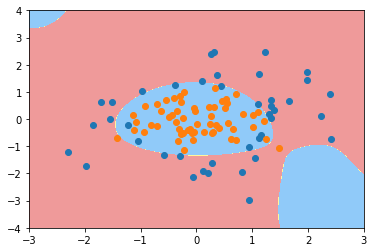

In [15]:
plot_decision_boundary(pol_log_res2, [-3, 3, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### 逻辑回归中使用正则化
#### J (θ )	+α L2 ， J (θ )	+α L1， C ⋅ J (θ ) + L1， C ⋅ J (θ ) + L2

In [16]:
def polynomialLogisticRegression2(degree, C, penalty):
    return Pipeline([('poly', PolynomialFeatures(degree)), 
                     ('stand', StandardScaler()),
                     ('log_res', LogisticRegression(C=C, penalty=penalty))])

In [17]:
poly2_log_res = polynomialLogisticRegression2(20, 0.1, penalty="l2")

In [18]:
poly2_log_res.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('stand',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_res',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


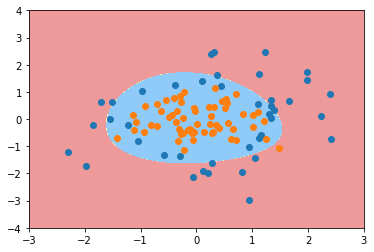

In [19]:
plot_decision_boundary(poly2_log_res, [-3, 3, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()